In [1]:
# https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image
from __future__ import print_function
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster

NUM_CLUSTERS = 5
image_filename = "super_condesed_always_recycle_art/composites/composite_393.jpg"

print('reading image')
im = Image.open(image_filename)
im = im.resize((150, 150))      # optional, to reduce time
ar = np.asarray(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

print('finding clusters')
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
print('cluster centres:\n', codes)

vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most frequent is %s (#%s)' % (peak, colour))

reading image
finding clusters
cluster centres:
 [[211.99944843 153.29564258 147.00772201]
 [168.29370158 100.74334793 104.88683058]
 [122.34195184  89.51508238 110.99087452]
 [145.4769982  132.46222051 145.88049345]
 [157.5396428  162.86045735 174.32398598]]
most frequent is [145.4769982  132.46222051 145.88049345] (#918491)


In [2]:
# bonus: save image using only the N most common colours
import imageio
c = ar.copy()
for i, code in enumerate(codes):
    c[scipy.r_[scipy.where(vecs==i)],:] = code
imageio.imwrite(image_filename.split("/")[2]+'_clusters.png', c.reshape(*shape).astype(np.uint8))
print('saved clustered image')

saved clustered image


In [7]:
! pip install colorthief

In [8]:
from colorthief import ColorThief
color_thief = ColorThief(image_filename)
# get the dominant color
dominant_color = color_thief.get_color(quality=1)

In [9]:
print(dominant_color)

(150, 131, 143)


In [10]:
print(color_thief.get_color(quality=1))
print(color_thief.get_palette(quality=1))

(150, 131, 143)
[(145, 132, 147), (227, 153, 140), (131, 63, 62), (128, 63, 114), (153, 94, 91), (163, 175, 197), (188, 143, 146), (166, 182, 180), (88, 90, 106)]


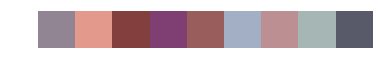

In [24]:
# https://stackoverflow.com/questions/51728957/create-a-color-palette-image-from-a-list-of-rgb-color
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# palette = [(82, 129, 169), (218, 223, 224), (147, 172, 193), (168, 197, 215), (117, 170, 212)]
palette = color_thief.get_palette(quality=1)
palette = np.array(palette)[np.newaxis, :, :]

plt.imshow(palette);
plt.axis('off');
plt.savefig(image_filename.split("/")[2] + "_color_palette_test.jpg", pad_inches=0)
plt.show();

In [20]:
plt.savefig(image_filename.split("/")[2] + "_color_palette.jpg")

<Figure size 432x288 with 0 Axes>

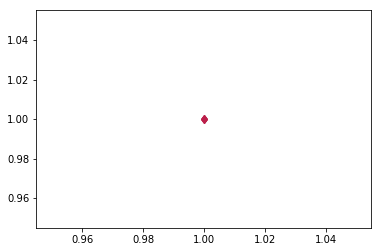

In [18]:
import matplotlib.pyplot as plt
X = [1, 1, 1]
Y = [1, 1, 1]
plt.plot(X,Y,marker='d',color=(188/255.0, 32/255.0, 75/255.0))

In [25]:
! pip install webcolors

In [28]:
import webcolors
webcolors.rgb_to_name((0, 0, 0))

'black'

In [29]:
webcolors.name_to_hex('deepskyblue')

'#00bfff'

In [30]:
dominant_color = color_thief.get_color(quality=1)
dominant_color

(150, 131, 143)

In [32]:
webcolors.rgb_to_name(dominant_color)

ValueError: '#96838f' has no defined color name in css3

In [33]:
webcolors.html5_parse_legacy_color('chucknorris')
#HTML5SimpleColor(red=192, blue=0, green=0)

HTML5SimpleColor(red=192, green=0, blue=0)